# Introduction of the Project :
This is an olympics data of various different years representing the athlete informations and medals won

## Data Description 
8619 observations and 10 rows 

name - name of the athlete 

age - age of the athlete 

country - country represented by athlete 

year - year that the athlete participated in 

date_given - date of the participation 

sports- the game that the athlete participated in 

gold medal - No. of gold medals won by athlete 

silver medal - no. of silver medals won by the athlete 

bronze medal - no. of bronze medals won by the athlete 

total medals - sum of all the medals won by the athlete 



In [ ]:
pip install pyspark 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing and configuring all the necessary libraries 
#Initiallizing pyspark
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession 
from pyspark.sql import SQLContext
#Spark Config
conf = SparkConf().setAppName("aadhar_app")
sc = SparkContext(conf = conf)
spark = SparkSession.builder.appName('Aadhar').getOrCreate()

ValueError: ignored

In [ ]:
from pyspark.sql import functions as f

In [116]:
df = spark.read.format("csv").option("header", "True").option("inferSchema", "True").load("/content/olympix_data_organized_with_header (1) (1).csv")

In [117]:
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [118]:
import regex as re

In [119]:
df = df.withColumn("name", f.regexp_replace(df['name'], "[^A-Za-z0-9_]", ""));
df.show(16)

+---------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|           name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+---------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|  MichaelPhelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|  MichaelPhelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|  MichaelPhelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|NatalieCoughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|   AlekseyNemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|          6|
|   AliciaCoutts| 24|    Austral

In [120]:
df.filter(df.name.isNull()).show() # here we can see name and age has null values and also it contains duplicates 

+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|name| age|  country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+



Dropping all these null values as "name" cannot be filled with random values, it will lead to less reliability of data 

In [121]:
df = df.dropna() # dropping the 5 rows containing null values shown above

In [122]:
df.select('sports').distinct().show(50)  # here are all the Games/Sports played in the olympics

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

In [123]:
# Importing libraries for data visualisation
import seaborn as sns 
from matplotlib import pyplot as plt 

In [124]:
res = df.groupBy('sports').agg({"total_medal":"sum"}) #Getting total medals for each sports
res.show()

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
+--------------------+----------------+
only showing top 20 rows



In [125]:
pandas_df = res.toPandas() # converting to pyspark dataframe to pandas for plotting 

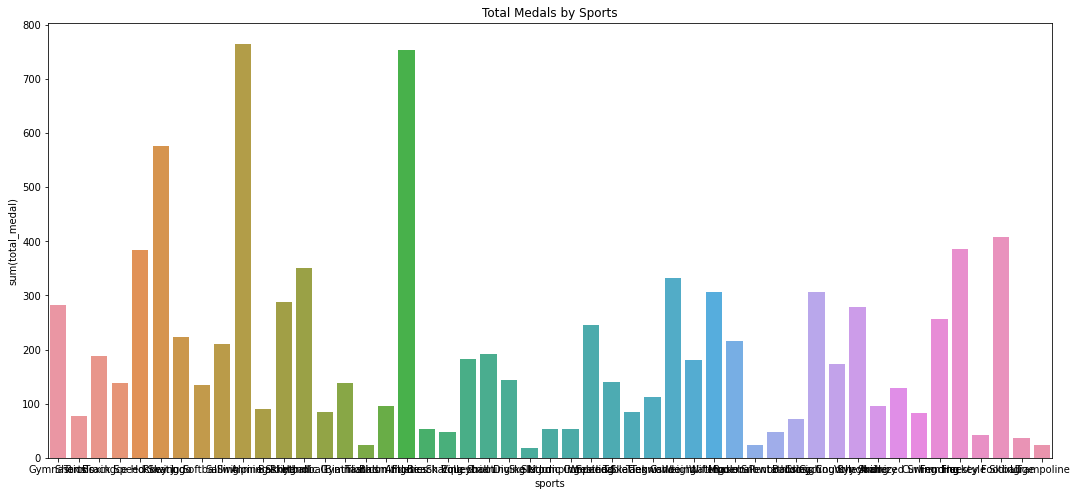

In [126]:
plt.figure(figsize= (18,8))
plt.title('Total Medals by Sports')
sns.barplot(x = "sports", y = "sum(total_medal)", data = pandas_df) # plotting bargraph for the data 

In [127]:
sorted_res = df.groupBy('sports').agg({"total_medal":"sum"}).sort('sum(total_medal)', ascending = False ) 
 # getting total medal for each sport sorted by highest medals

In [128]:
sorted_res.show()

+----------+----------------+
|    sports|sum(total_medal)|
+----------+----------------+
|  Swimming|             765|
| Athletics|             753|
|    Rowing|             576|
|  Football|             407|
|    Hockey|             386|
|Ice Hockey|             384|
|  Handball|             351|
|  Canoeing|             333|
| Waterpolo|             306|
|   Cycling|             306|
|Basketball|             287|
|Gymnastics|             282|
|Volleyball|             278|
|   Fencing|             256|
| Wrestling|             245|
|      Judo|             224|
|  Baseball|             216|
|   Sailing|             210|
|  Shooting|             192|
|    Boxing|             188|
+----------+----------------+
only showing top 20 rows



In [136]:
swimming_df = df.where(df['sports'] == "Swimming") # creating a dataframe only consisting of swimming sports

In [139]:
swimming_df.show() 

+-------------------+---+-------------+----+----------+--------+----------+------------+-----------+-----------+
|               name|age|      country|year|Date_Given|  sports|gold_medal|silver_medal|brone_medal|total_medal|
+-------------------+---+-------------+----+----------+--------+----------+------------+-----------+-----------+
|      MichaelPhelps| 23|United States|2008| 8/24/2008|Swimming|         8|           0|          0|          8|
|      MichaelPhelps| 19|United States|2004| 8/29/2004|Swimming|         6|           0|          2|          8|
|      MichaelPhelps| 27|United States|2012|08-12-2012|Swimming|         4|           2|          0|          6|
|    NatalieCoughlin| 25|United States|2008| 8/24/2008|Swimming|         1|           2|          3|          6|
|       AliciaCoutts| 24|    Australia|2012|08-12-2012|Swimming|         1|           3|          1|          5|
|      MissyFranklin| 17|United States|2012|08-12-2012|Swimming|         4|           0|        

In [137]:
total_swimming_medal = swimming_df.groupBy(df['country']).agg({"total_medal":"sum"}) 
# creating a data frame consisting of total medal won by each country in swimming

In [138]:
total_swimming_medal.show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|              20|
|       Sweden|               9|
|      Germany|              32|
|       France|              39|
|     Slovakia|               2|
|    Argentina|               1|
|Great Britain|              11|
|United States|             267|
|        China|              35|
|      Belarus|               2|
|      Croatia|               1|
|        Italy|              16|
|    Lithuania|               1|
|       Norway|               2|
|        Spain|               3|
|      Denmark|               1|
|      Ukraine|               7|
|  South Korea|               4|
|     Zimbabwe|               7|
|      Tunisia|               3|
+-------------+----------------+
only showing top 20 rows



In [147]:
skeleton_df = df.where(df['sports'] == "Skeleton")
#creating a dataframe for skeleton sports

In [ ]:
skeleton_df.show()

In [149]:
total_skeleton_medal= skeleton_df.groupBy('country').agg({'total_medal':'sum'})
#creating dataframe for total medals won in skeleton game by each country

In [150]:
total_skeleton_medal.show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|               1|
|      Germany|               2|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|       Latvia|               1|
|       Canada|               4|
|      Austria|               1|
+-------------+----------------+



In [153]:
US_df = df.where(df['country'] == "United States") # creating dataframe where country is United States

In [154]:
US_df.show()

+---------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|           name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+---------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  MichaelPhelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  MichaelPhelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  MichaelPhelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|NatalieCoughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|  MissyFranklin| 17|United States|2012|08-12-2012|  Swimming|         4|           0|          1|          5|
|     RyanLochte| 27|United States|2012|08-12-2012|  Swimming|         2|           2|          1|          5|
|

In [156]:
Yearly_medals_US = US_df.groupBy("year").agg({'total_medal':'sum'}) # Creating dataframe for total medals wonn by US in each year 

In [157]:
Yearly_medals_US.show()

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



In [158]:
Country_medals = df.groupBy('country').agg({'total_medal':'sum'})

In [159]:
Country_medals.show()

+--------------+----------------+
|       country|sum(total_medal)|
+--------------+----------------+
|        Russia|             768|
|      Paraguay|              17|
|Chinese Taipei|              20|
|        Sweden|             181|
|       Eritrea|               1|
|     Singapore|               7|
|      Malaysia|               3|
|        Turkey|              28|
|       Germany|             629|
|   Afghanistan|               2|
|         Sudan|               1|
|        France|             318|
|        Greece|              59|
|     Sri Lanka|               1|
|       Algeria|               8|
|          Togo|               1|
|      Slovakia|              35|
|     Argentina|             139|
|       Belgium|              18|
| Great Britain|             322|
+--------------+----------------+
only showing top 20 rows



In [178]:
df.agg({'age':'max'}).show() # getting the max age 

+--------+
|max(age)|
+--------+
|      61|
+--------+



In [182]:
max_age_athlete = df.select('name','age','country').where(df['age'] == 61) # finding the athlete whose age is 61 i.e athlete with ma age 

In [183]:
max_age_athlete.show()

+---------+---+-------+
|     name|age|country|
+---------+---+-------+
|IanMillar| 61| Canada|
+---------+---+-------+



Ian Millar is the oldest athlete in the olympics database 
and he is from Canada 